# Loan Application Status Prediction

Loan Application Status Prediction

Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
1.Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.Married - This refers to applicant being in a state of matrimony

4.Dependents - This refres to persons who depends on the applicants for survival

5.Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [212]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [137]:
from imblearn.over_sampling import SMOTE

In [138]:
#Loading the dataset(Creating the dataframe)
column_names = ['LoanID','Gender','Married','Dependents','Education','SelfEmployed','ApplicantIncome','CoapplicantIncome','LoanAmount','LoanAmountTerm','CreditHistory','PropertyArea','LoanStatus']
df=pd.read_csv('Loan_Status_Prediction.csv',names=column_names, header=None)
df

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [139]:
df.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [140]:
df.tail()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [141]:
df.sample(10)

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
489,LP002556,Male,No,0,Graduate,No,2435,0.0,75.0,360.0,1.0,Urban,N
255,LP001846,Female,No,3+,Graduate,No,3083,0.0,255.0,360.0,1.0,Rural,Y
51,LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.0,1.0,Semiurban,Y
43,LP001131,Male,Yes,0,Graduate,No,3941,2336.0,134.0,360.0,1.0,Semiurban,Y
378,LP002224,Male,No,0,Graduate,No,3069,0.0,71.0,480.0,1.0,Urban,N
205,LP001692,Female,No,0,Not Graduate,No,4408,0.0,120.0,360.0,1.0,Semiurban,Y
77,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban,N
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y


In [142]:
print("Columns :",df.columns) 
print("shape:", df.shape)
print("info:", df.info())
print("data types:", df.dtypes)

Columns : Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')
shape: (614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   LoanAmountTerm     600 non-null    float64
 10  CreditHistory      564 non-null    float64
 11  Pr

In [143]:
df.isnull().sum() #checking the null values in columns

LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64

In [144]:
#we can drop the column 'LoanID'.
df.drop(['LoanID'],axis=1,inplace=True)

In [145]:
df

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [146]:
# checking the duplicate values
df.duplicated().sum()

0

In [147]:
df.nunique().to_frame("no. of unique values")  # no. of unique values in all columns of the Dataframe

,no. of unique values
Gender,2
Married,2
Dependents,4
Education,2
SelfEmployed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
LoanAmountTerm,10
CreditHistory,2


In [148]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Gender
Male      489
Female    112
Name: count, dtype: int64


Married
Yes    398
No     213
Name: count, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


SelfEmployed
No     500
Yes     82
Name: count, dtype: int64


ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64


LoanAmountTerm
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
12

In [149]:
#seperating the numerical and categorical columns
#Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:",categorical_col)
print("\n")

categorical columns: ['Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed', 'PropertyArea', 'LoanStatus']




In [150]:
#Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical columns:",numerical_col)
print("\n")

numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm', 'CreditHistory']




In [151]:
#Removing null values from the float64 datatype column
from sklearn.impute import SimpleImputer


imp=SimpleImputer(strategy='median')
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['LoanAmountTerm']=imp.fit_transform(df['LoanAmountTerm'].values.reshape(-1,1))
df['CreditHistory']=imp.fit_transform(df['CreditHistory'].values.reshape(-1,1))

In [152]:
#Removing null values in the object column

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['SelfEmployed']=df['SelfEmployed'].fillna(df['SelfEmployed'].mode()[0])

In [153]:
# Again checking the duplicate values
df.duplicated().sum()

0

In [154]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Gender
Male      502
Female    112
Name: count, dtype: int64


Married
Yes    401
No     213
Name: count, dtype: int64


Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


SelfEmployed
No     532
Yes     82
Name: count, dtype: int64


ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


LoanAmount
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64


LoanAmountTerm
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
12

# Data Visualization

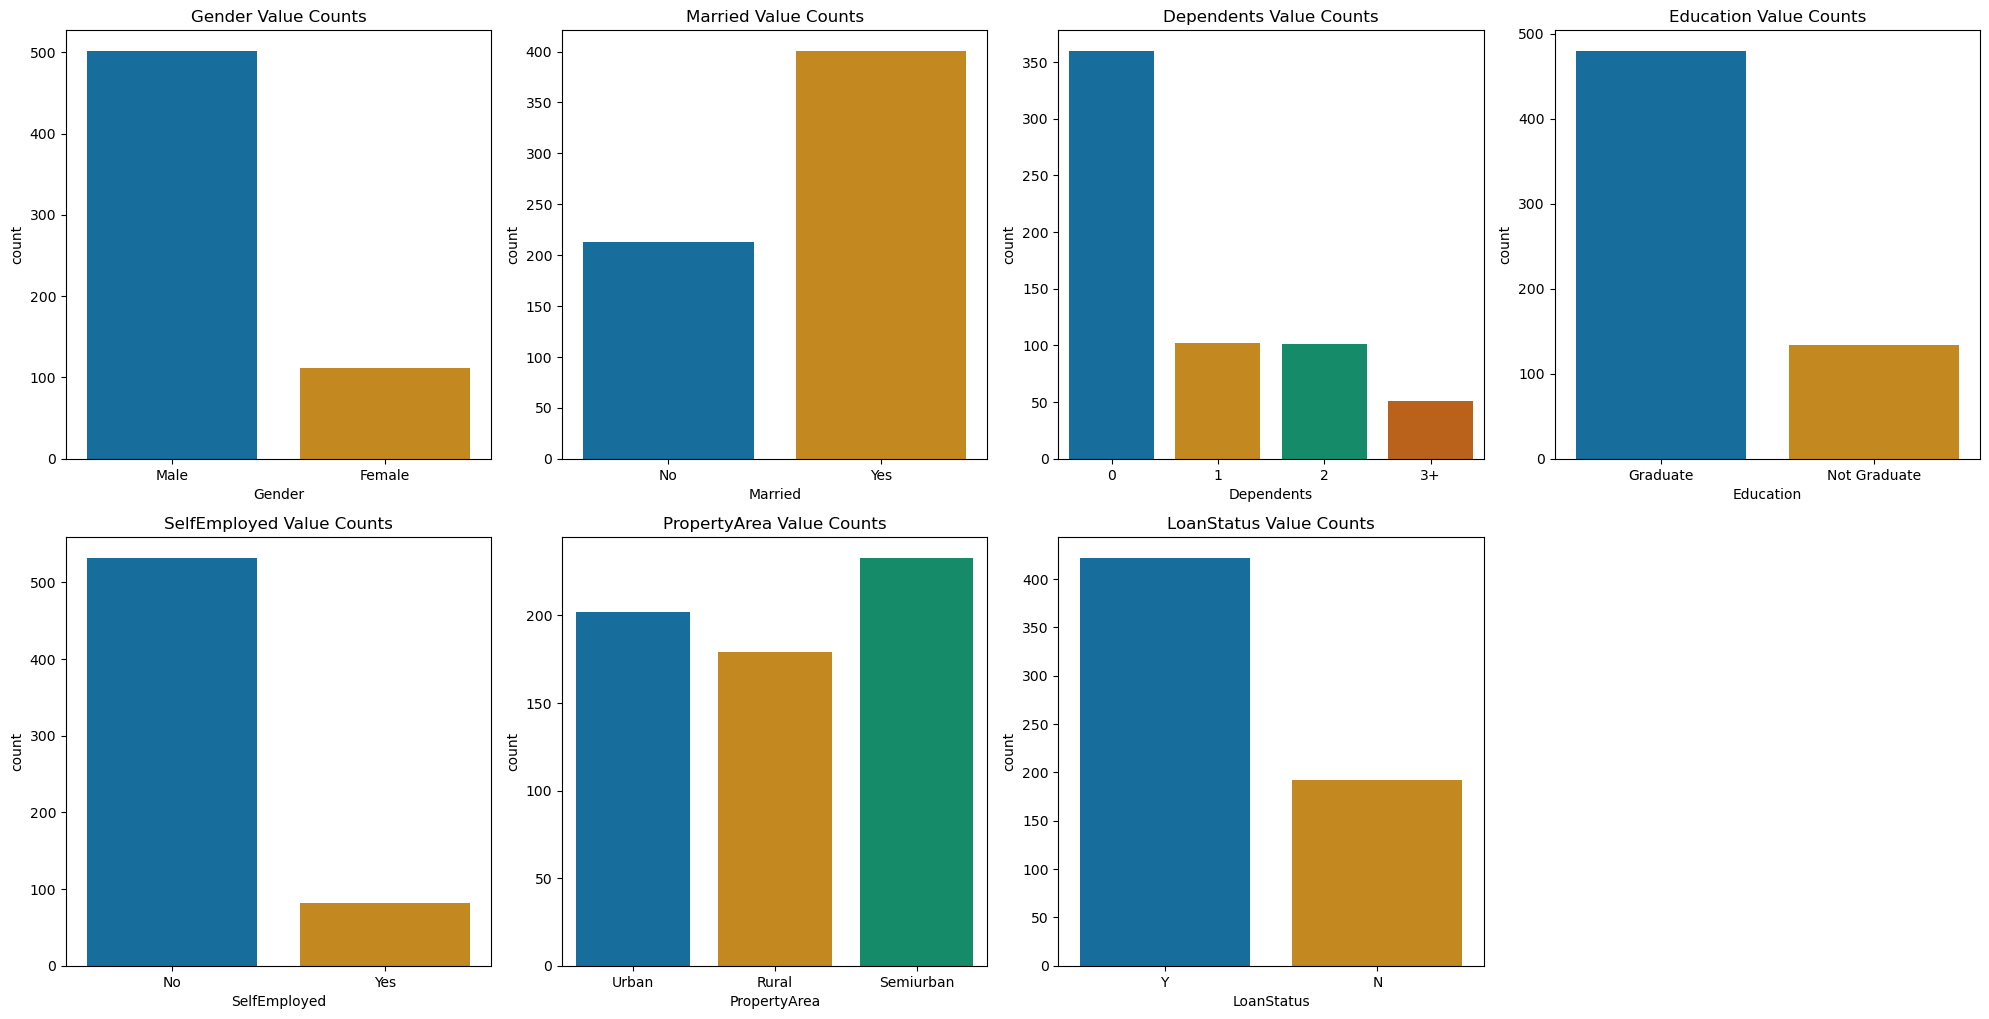

In [155]:
plt.figure(figsize=(20,20 ))
plotnumber=1
for i in categorical_col:
    if plotnumber<=16:
        plt.subplot(4, 4, plotnumber)
        sns.countplot(x=df[i],palette='colorblind')
        plt.title(f'{i} Value Counts')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

Observations:- 1. 82% applicants who have applied for loan are male.
    2. Majority of applicants are married 
    3. Mostly Applicants have zero dependents.
    4. Mostly graduate applicants applied for loan
    5. SelfEmployed Applicants value counts are less compared than not selfemployed.
    6. Property Area(total area within the boundaries of the property) are divided into 3 from which semiurban area are in high demand for loan.
    7. mostly applicants are eligible to be availed the Loan requested.
    

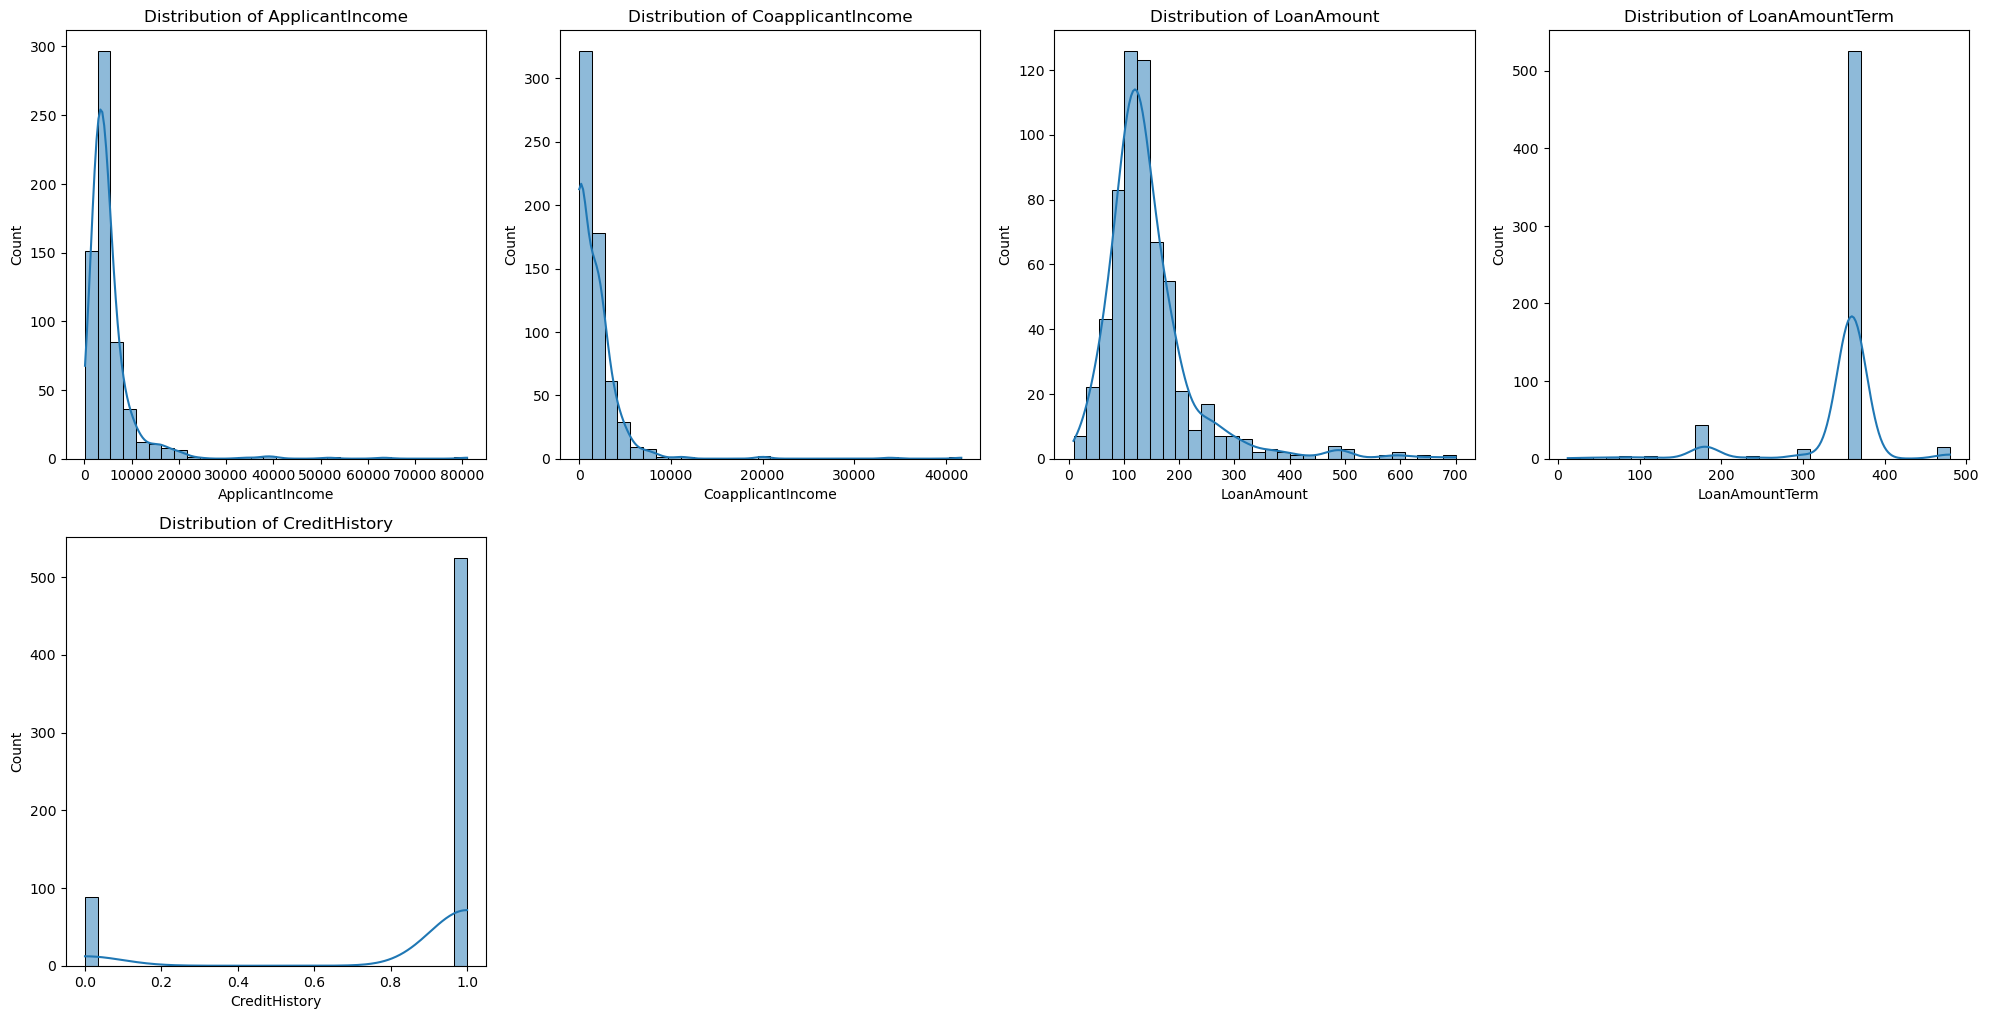

In [156]:
plt.figure(figsize=(20,20 ))
plotnumber=1
for i in numerical_col:
    if plotnumber<=16:
        plt.subplot(4, 4, plotnumber)
        sns.histplot(df[i], kde=True, bins=30)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

Mostly column's data are left skewed.

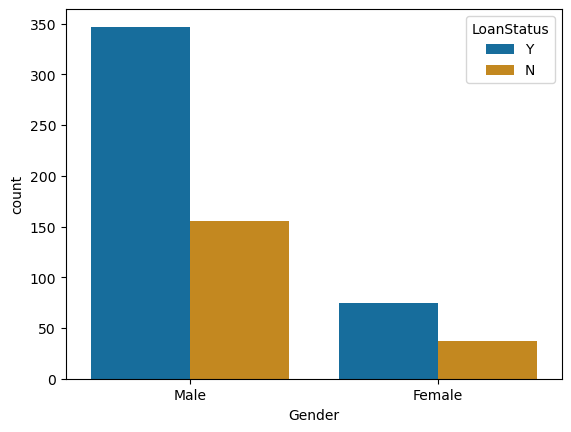

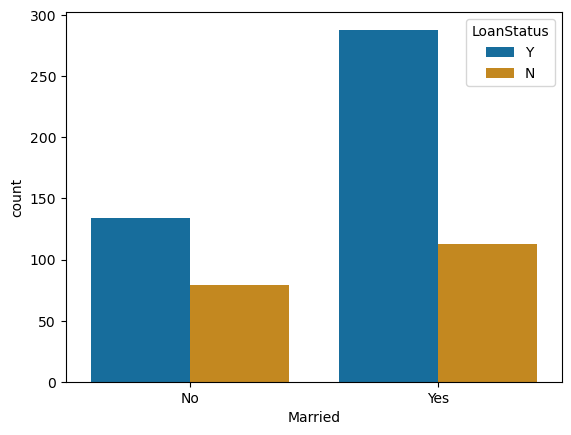

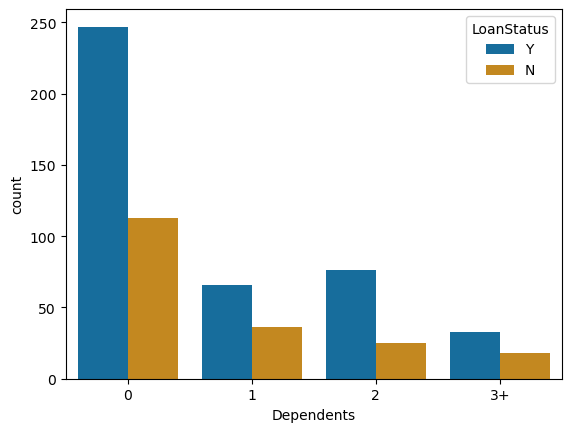

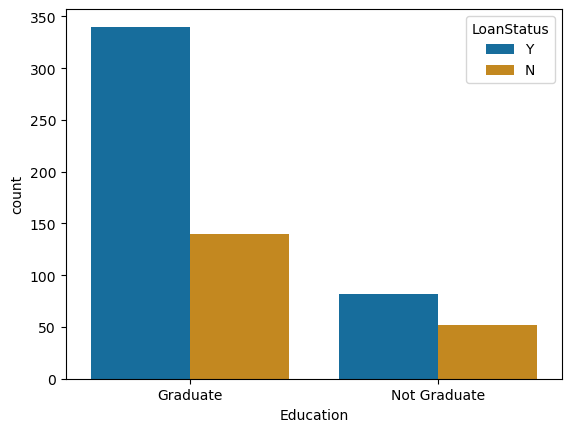

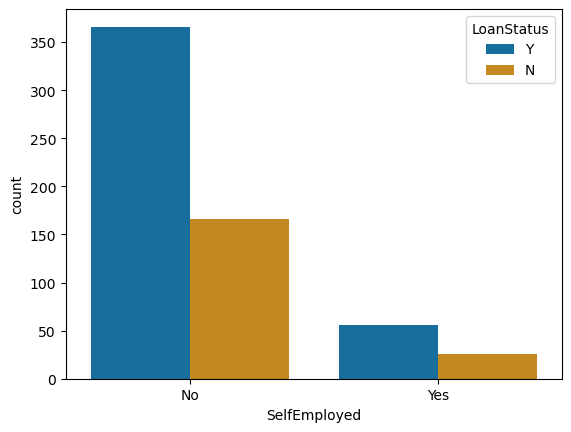

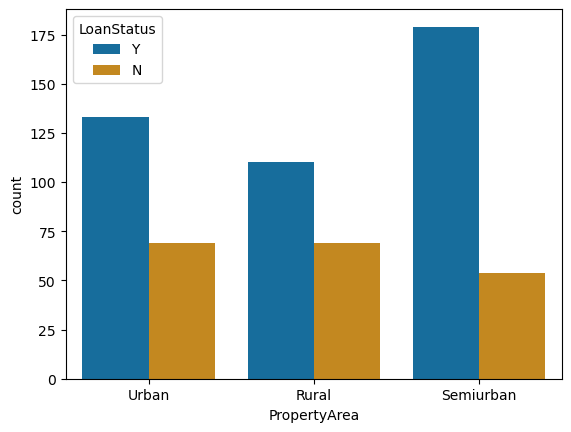

In [157]:
for i in categorical_col[0:6]:
    sns.countplot(x=df[i], hue ="LoanStatus",palette='colorblind',data=df)
    plt.show()

Observations: 1. Mostly male applicant's loan have approved compared than female.
    2. Majority of married applicants loan have approved.
    3. Applicants having maximum number of dependants have approved the less number of loan requests.
    4. Majority graduate applicants loan requests have approved.
    5. maximum number of not selfemployed applicants approved the loan
    6. Majority applicants applied for semiurban property area have approved the loan
    
    

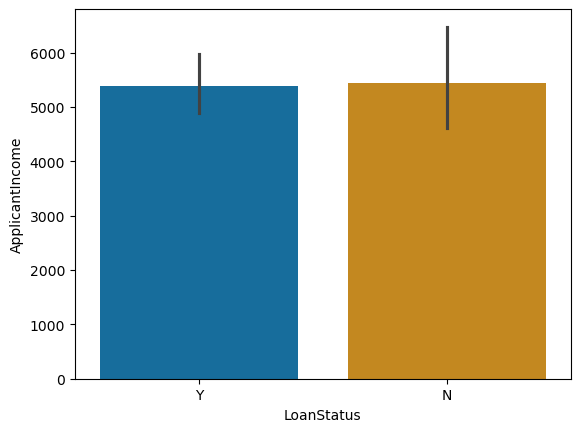

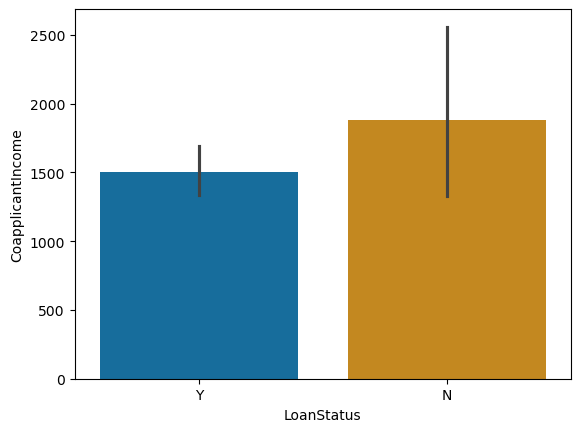

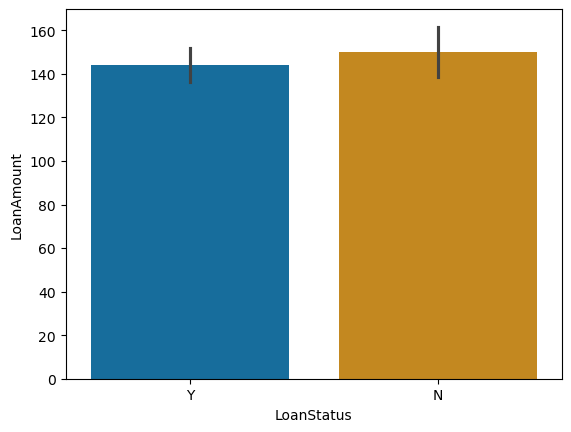

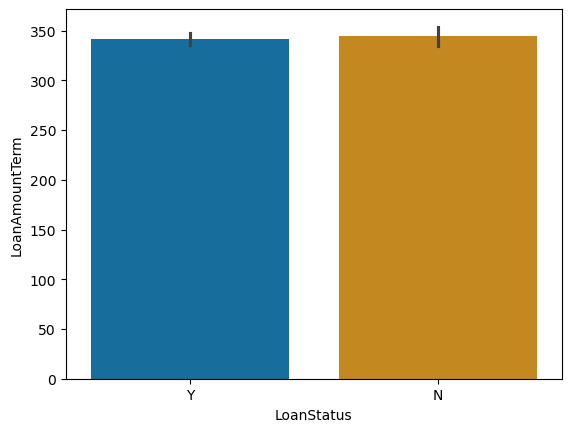

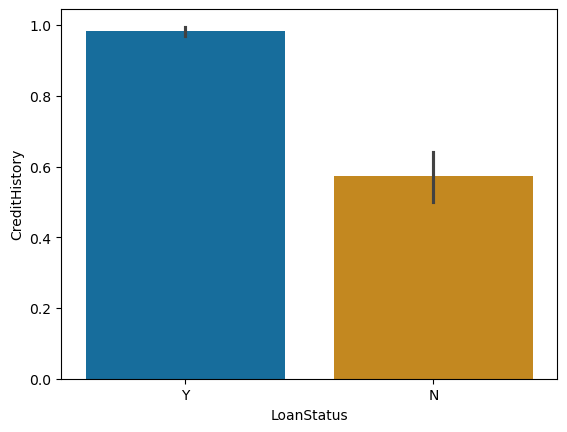

In [158]:
for i in numerical_col:
    sns.barplot(y=df[i], x ="LoanStatus",palette='colorblind',data=df)
    plt.show()

Observations: 1.There is no any significance role of applicantIncome parameter for choosing whether loan request should be approved or not for particular applicant.
    2. if CoapplicantIncome is more than 15%(approx) of the AplicantIncome, then there are high chances not to approve the loan.
    3. There is no significance role of LoanAmount and LoanAmountTerm parameter to decide whether loan have approved or not.
    4. applicant having credithistory have high chances of loan approval.
    
    

In [159]:
#Encoding the object type columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df['Married']=LabelEncoder().fit_transform(df['Married'])
df['Education']=LabelEncoder().fit_transform(df['Education'])
df['PropertyArea']=LabelEncoder().fit_transform(df['PropertyArea'])
df['LoanStatus']=LabelEncoder().fit_transform(df['LoanStatus'])
df['SelfEmployed']=LabelEncoder().fit_transform(df['SelfEmployed'])
df['Dependents']=LabelEncoder().fit_transform(df['Dependents'])

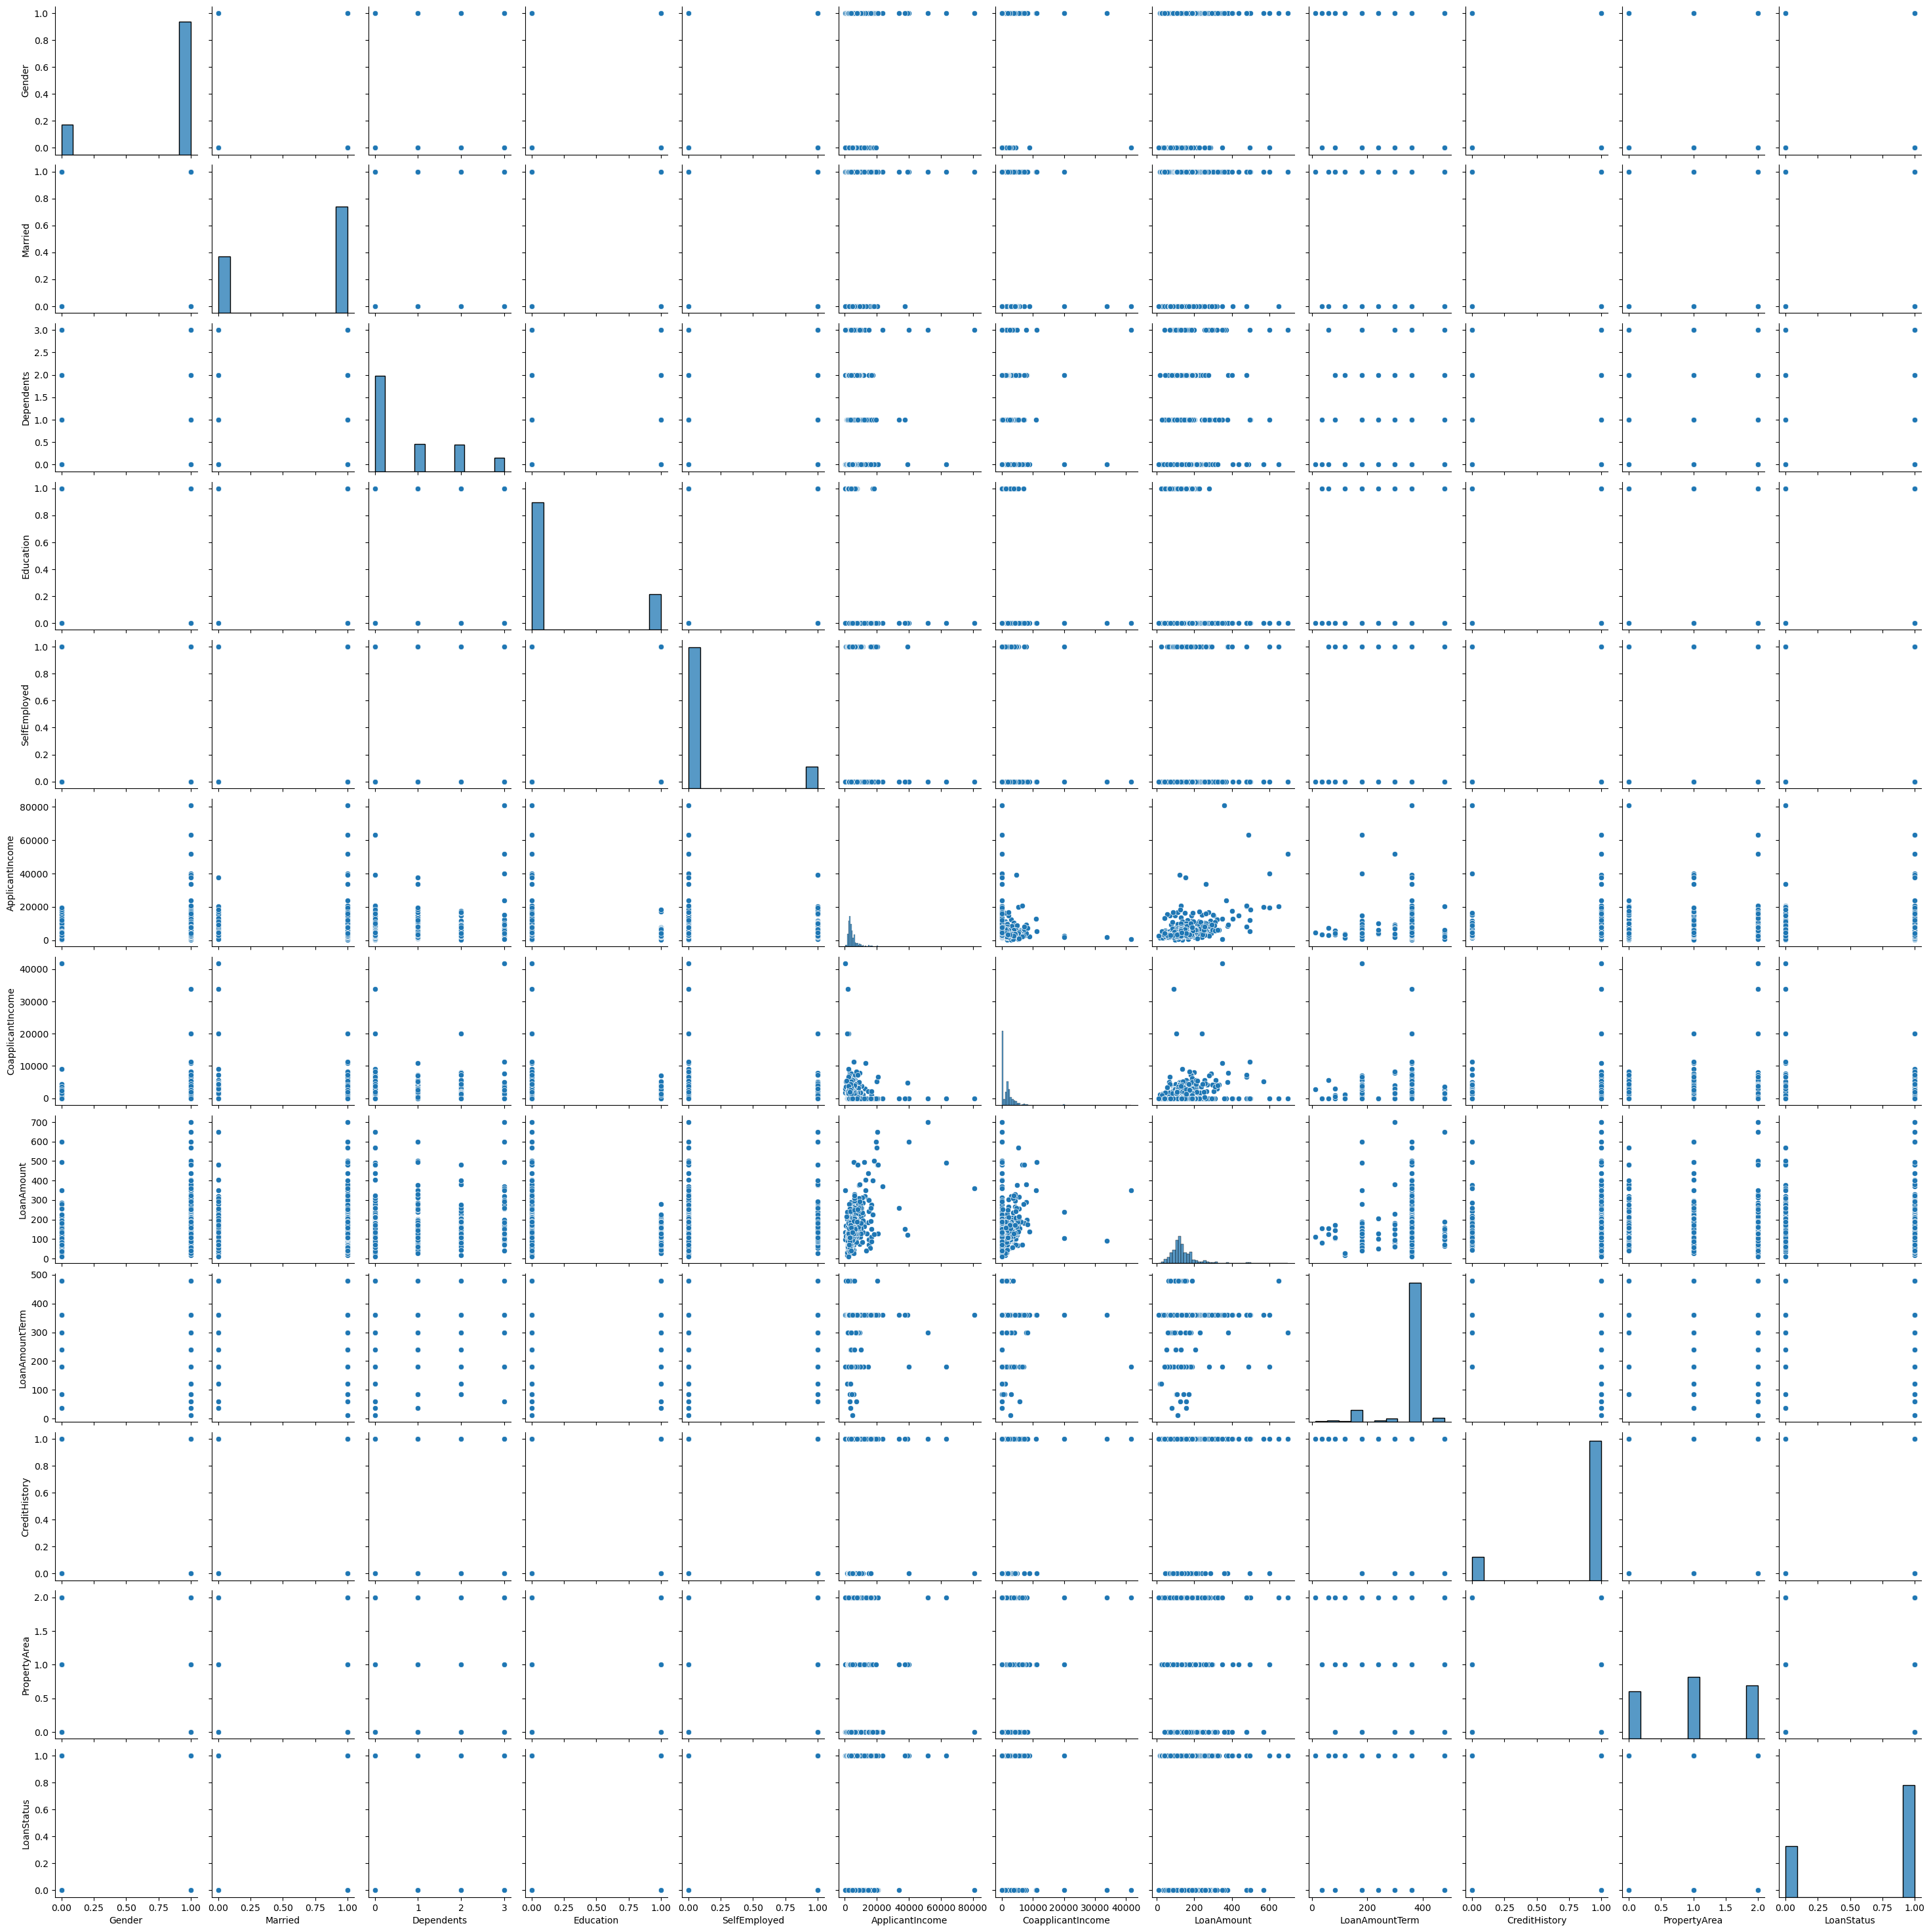

In [160]:
sns.pairplot(df)

In [161]:
df.corr()

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
SelfEmployed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
LoanAmountTerm,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
CreditHistory,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


<Axes: >

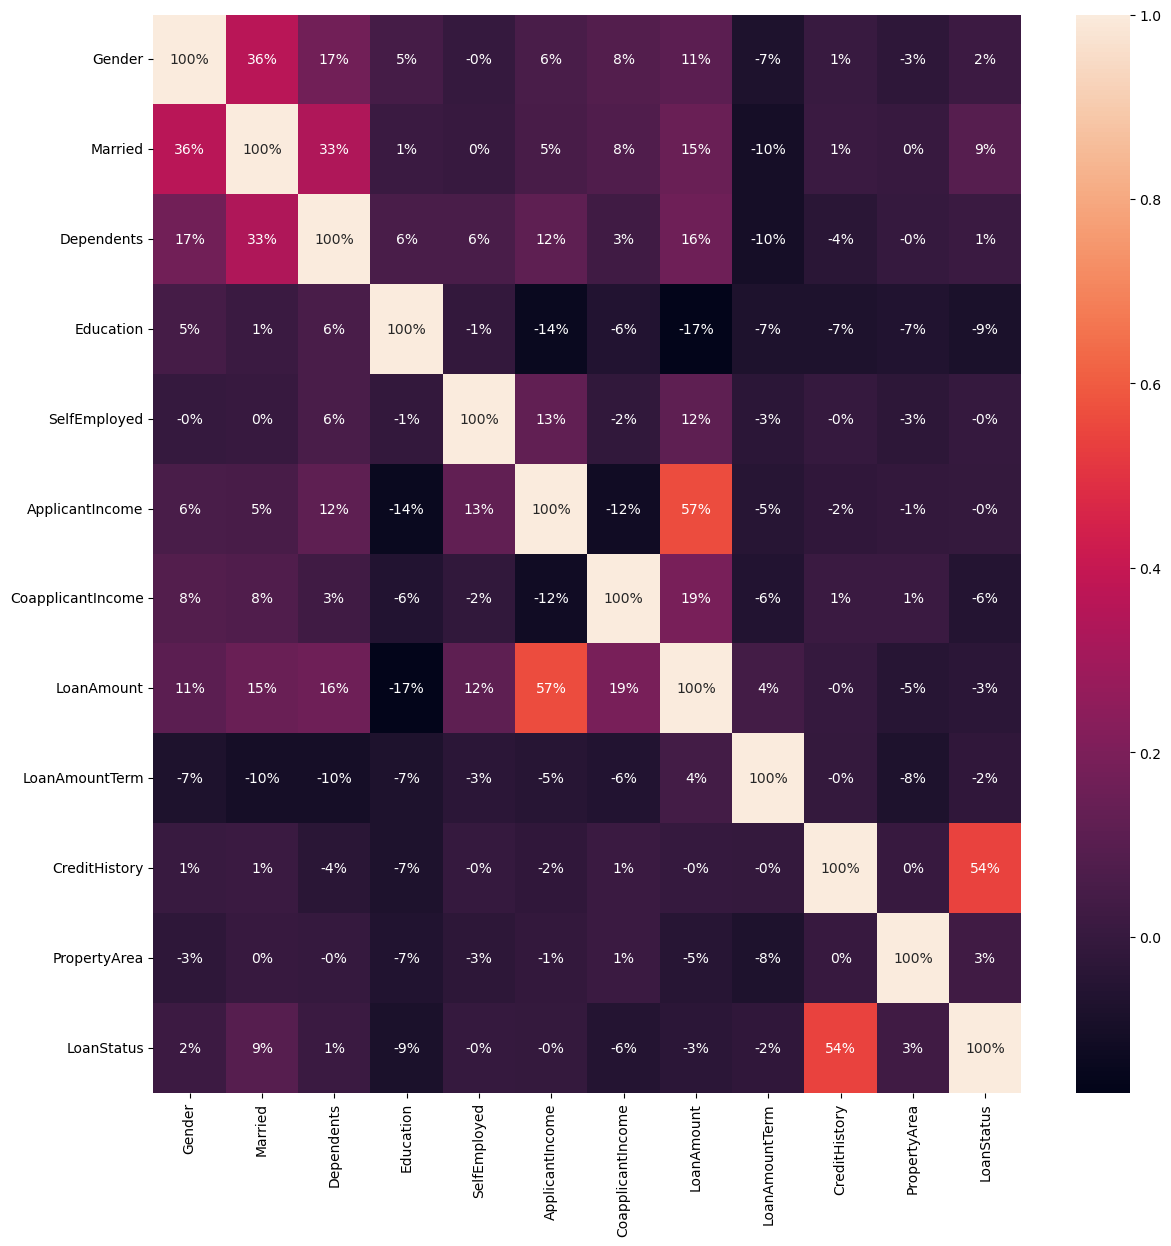

In [162]:
#Visualizing the correlation
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [163]:
df.describe()

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Observations:-
    1. there is huge difference between 75% and max in ApplicantIncome, CoapplicantIncome, LoanAmount and LoanAmountTerm columns.so outliers are present.
    2. data is mostly right skewed (mean> median) and remaioning are left skewed(mean< median)

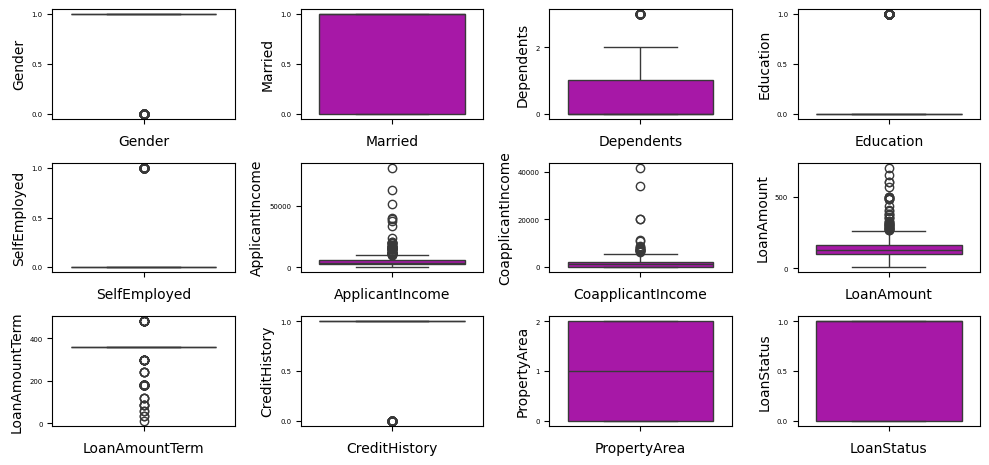

In [164]:
#Checking for outliers using boxplots
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for i in df.columns[0:15]:
    if plotnumber<=16:
        plt.subplot(4, 4, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.xlabel(i,fontsize=10)
        plt.yticks(rotation=0, fontsize=5)
    plotnumber+=1
plt.tight_layout()
plt.show()



In [165]:
#Removing outliers using zscore
z=np.abs(zscore(df))
print(z)

       Gender   Married  Dependents  Education  SelfEmployed  ApplicantIncome  \
0    0.472343  1.372089    0.737806   0.528362      0.392601         0.072991   
1    0.472343  0.728816    0.253470   0.528362      0.392601         0.134412   
2    0.472343  0.728816    0.737806   0.528362      2.547117         0.393747   
3    0.472343  0.728816    0.737806   1.892641      0.392601         0.462062   
4    0.472343  1.372089    0.737806   0.528362      0.392601         0.097728   
..        ...       ...         ...        ...           ...              ...   
609  2.117107  1.372089    0.737806   0.528362      0.392601         0.410130   
610  0.472343  0.728816    2.236021   0.528362      0.392601         0.212557   
611  0.472343  0.728816    0.253470   0.528362      0.392601         0.437174   
612  0.472343  0.728816    1.244745   0.528362      0.392601         0.357064   
613  2.117107  1.372089    0.737806   0.528362      2.547117         0.134412   

     CoapplicantIncome  Loa

In [166]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([  0,   0,   0, ..., 613, 613, 613]), array([ 0,  1,  2, ...,  9, 10, 11]))
(614, 12)


In [167]:
#Assign the value to df1 which are less than threshold value and removing outliers
df1=df[(z<3).all(axis=1)]

In [168]:
print(df.shape)
print(df1.shape)
print('Shape after removing outliers:',df1.shape)

(614, 12)
(577, 12)
Shape after removing outliers: (577, 12)


In [169]:
#%data loss calculation
loss_percent=((614-577)/614)*100
print(loss_percent)

6.026058631921824


6% data loss is acceptable.

In [170]:
# checking the skewness
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
SelfEmployed         2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
LoanAmountTerm      -2.098806
CreditHistory       -1.976043
PropertyArea        -0.055332
LoanStatus          -0.822635
dtype: float64

In [171]:
#Removing skewness using'log1p' method
skew=('Dependents','Education','SelfEmployed','ApplicantIncome','CoapplicantIncome','LoanAmount','LoanAmountTerm','CreditHistory')
for col in skew:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [172]:
# again checking the skewness
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
SelfEmployed         2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.669196
LoanAmountTerm      -2.098806
CreditHistory       -1.976043
PropertyArea        -0.055332
LoanStatus          -0.822635
dtype: float64

In [173]:
df=df1

In [174]:
x=df.drop("LoanStatus",axis=1)
y=df["LoanStatus"]

# Checking the multicollinearity

In [186]:
df.corr()

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
Gender,1.000000,0.378997,0.188828,0.045696,-0.006207,0.060302,0.235133,0.176670,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.345029,0.024817,-0.015779,-0.026283,0.339399,0.186042,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188828,0.345029,1.000000,0.065629,0.056754,0.108236,0.018101,0.130546,-0.094854,-0.018182,0.021226,0.019319
Education,0.045696,0.024817,0.065629,1.000000,-0.007139,-0.174609,0.054682,-0.113107,-0.090523,-0.075217,-0.068596,-0.092658
SelfEmployed,-0.006207,-0.015779,0.056754,-0.007139,1.000000,0.207418,-0.089466,0.113228,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.060302,-0.026283,0.108236,-0.174609,0.207418,1.000000,-0.362495,0.404964,-0.070193,0.027449,-0.010603,-0.001761
CoapplicantIncome,0.235133,0.339399,0.018101,0.054682,-0.089466,-0.362495,1.000000,0.199782,0.004463,0.008071,-0.072402,0.081455
LoanAmount,0.176670,0.186042,0.130546,-0.113107,0.113228,0.404964,0.199782,1.000000,0.052626,-0.011766,-0.106480,-0.018683
LoanAmountTerm,-0.104983,-0.127348,-0.094854,-0.090523,-0.032914,-0.070193,0.004463,0.052626,1.000000,0.027392,-0.057004,-0.020291
CreditHistory,0.013172,0.019308,-0.018182,-0.075217,-0.016390,0.027449,0.008071,-0.011766,0.027392,1.000000,-0.008121,0.560936


In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [188]:
x=df.iloc[:,0:-1]
x

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea
0,1,0,0.000000,0.000000,0.000000,8.674197,0.000000,4.859812,360.0,1.0,2
1,1,1,0.693147,0.000000,0.000000,8.430327,7.319202,4.859812,360.0,1.0,0
2,1,1,0.000000,0.000000,0.693147,8.006701,0.000000,4.204693,360.0,1.0,2
3,1,1,0.000000,0.693147,0.000000,7.857094,7.765993,4.795791,360.0,1.0,2
4,1,0,0.000000,0.000000,0.000000,8.699681,0.000000,4.955827,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0.000000,0.000000,7.972811,0.000000,4.276666,360.0,1.0,0
610,1,1,1.386294,0.000000,0.000000,8.320448,0.000000,3.713572,180.0,1.0,0
611,1,1,0.693147,0.000000,0.000000,8.996280,5.484797,5.537334,360.0,1.0,2
612,1,1,1.098612,0.000000,0.000000,8.933796,0.000000,5.236442,360.0,1.0,2


In [191]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [192]:
vif_cal()

    VIF Values           Features
0     6.591876             Gender
1     4.092732            Married
2     1.882841         Dependents
3     1.299613          Education
4     1.182292       SelfEmployed
5   191.775564    ApplicantIncome
6     3.298298  CoapplicantIncome
7   190.611551         LoanAmount
8    40.887757     LoanAmountTerm
9     6.707442      CreditHistory
10    2.712708       PropertyArea


In [193]:
df.drop(['ApplicantIncome'],axis=1,inplace=True)

In [194]:
x=df.iloc[:,0:-1]
x

,Gender,Married,Dependents,Education,SelfEmployed,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea
0,1,0,0.000000,0.000000,0.000000,0.000000,4.859812,360.0,1.0,2
1,1,1,0.693147,0.000000,0.000000,7.319202,4.859812,360.0,1.0,0
2,1,1,0.000000,0.000000,0.693147,0.000000,4.204693,360.0,1.0,2
3,1,1,0.000000,0.693147,0.000000,7.765993,4.795791,360.0,1.0,2
4,1,0,0.000000,0.000000,0.000000,0.000000,4.955827,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0.000000,0.000000,0.000000,4.276666,360.0,1.0,0
610,1,1,1.386294,0.000000,0.000000,0.000000,3.713572,180.0,1.0,0
611,1,1,0.693147,0.000000,0.000000,5.484797,5.537334,360.0,1.0,2
612,1,1,1.098612,0.000000,0.000000,0.000000,5.236442,360.0,1.0,2


In [195]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: LoanStatus, Length: 577, dtype: int64

In [196]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [197]:
vif_cal()

   VIF Values           Features
0    6.512014             Gender
1    4.092729            Married
2    1.882776         Dependents
3    1.296423          Education
4    1.177448       SelfEmployed
5    2.727338  CoapplicantIncome
6   50.918113         LoanAmount
7   38.065064     LoanAmountTerm
8    6.535361      CreditHistory
9    2.648862       PropertyArea


In [198]:
df.drop(['LoanAmountTerm'],axis=1,inplace=True)

In [199]:
x=df.iloc[:,0:-1]
x

,Gender,Married,Dependents,Education,SelfEmployed,CoapplicantIncome,LoanAmount,CreditHistory,PropertyArea
0,1,0,0.000000,0.000000,0.000000,0.000000,4.859812,1.0,2
1,1,1,0.693147,0.000000,0.000000,7.319202,4.859812,1.0,0
2,1,1,0.000000,0.000000,0.693147,0.000000,4.204693,1.0,2
3,1,1,0.000000,0.693147,0.000000,7.765993,4.795791,1.0,2
4,1,0,0.000000,0.000000,0.000000,0.000000,4.955827,1.0,2
...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0.000000,0.000000,0.000000,4.276666,1.0,0
610,1,1,1.386294,0.000000,0.000000,0.000000,3.713572,1.0,0
611,1,1,0.693147,0.000000,0.000000,5.484797,5.537334,1.0,2
612,1,1,1.098612,0.000000,0.000000,0.000000,5.236442,1.0,2


In [200]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [201]:
vif_cal()

   VIF Values           Features
0    6.497802             Gender
1    4.050961            Married
2    1.874613         Dependents
3    1.295856          Education
4    1.171621       SelfEmployed
5    2.727090  CoapplicantIncome
6   13.941538         LoanAmount
7    6.435025      CreditHistory
8    2.640888       PropertyArea


# Feature Scaling using Standard Scalarization

In [204]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.77514304, ...,  0.06724876,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.57375944, ...,  0.06724876,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.77514304, ..., -1.47954804,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.57375944, ...,  1.66693887,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.36281681, ...,  0.95650505,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.77514304, ...,  0.15703486,
        -2.38941464, -0.03952504]])

In [205]:
y.value_counts()

LoanStatus
1    398
0    179
Name: count, dtype: int64

target is not balanced ... so we have to balance the target first by using SMOTE.

In [206]:
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [207]:
y1.value_counts()

LoanStatus
1    398
0    398
Name: count, dtype: int64

Now, data is balanced... we can build machine learning Classification Models.

# Modelling

In [209]:
# finding the Random state
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

#Finding best Random state
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    lgr=LogisticRegression()
    lgr.fit(x_train,y_train)
    predlgr=lgr.predict(x_test)
    acc=accuracy_score(y_test,predlgr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.7907949790794979 on Random_state 68


In [210]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=68)

In [213]:
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),ExtraTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),BaggingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy of",m,"is:   ",accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
   
    scr=cross_val_score(m,x1,y1,cv=5,scoring='accuracy')
    print(scr.mean())
    print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predm)-scr.mean())

    print()
    print()
    print()   


Accuracy of LogisticRegression() is:    0.7907949790794979
[[ 61  41]
 [  9 128]]
              precision    recall  f1-score   support

           0       0.87      0.60      0.71       102
           1       0.76      0.93      0.84       137

    accuracy                           0.79       239
   macro avg       0.81      0.77      0.77       239
weighted avg       0.81      0.79      0.78       239

0.7236635220125786
Difference between accuracy score and cross validation score is 0.06713145706691936



Accuracy of GaussianNB() is:    0.7824267782426778
[[ 51  51]
 [  1 136]]
              precision    recall  f1-score   support

           0       0.98      0.50      0.66       102
           1       0.73      0.99      0.84       137

    accuracy                           0.78       239
   macro avg       0.85      0.75      0.75       239
weighted avg       0.84      0.78      0.76       239

0.7236635220125786
Difference between accuracy score and cross validation score is 0

GradientBoostingClassifier model has the highest accuracy which is 85.77% (this may be due to overfitting). so we also checked the cross validation of each model for actual accuracy. After Cross Validation, we found out that the minimum difference between the accuracy score and cross validation score is .006 which is given by DecisionTreeClassifier(). Final model is Decision Tree Classifier which has the 76% actual accuracy (accuracy score).

# HyperParameter Tunning

In [222]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini', 'entropy', 'log_loss'],
'max_depth':[5, 10, 15, 25, 30,None],
'min_samples_split': [2, 5, 10, 15, 100],
'min_samples_leaf': [1, 2, 5, 8, 10],
'max_features':[1, 2, 5, 10]}

grid_search= GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3, verbose = 1, n_jobs = -1)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits
{'criterion': 'log_loss', 'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.7630921243824469


In [223]:
FinalModel=DecisionTreeClassifier(criterion='log_loss', max_depth= 15, max_features=5, min_samples_leaf= 5, min_samples_split=10)
FinalModel.fit(x_train,y_train)
pred=FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.7824267782426778


accuracy is improved

In [225]:
#AUC ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
FinalModel.fit(x_train,y_train)
y_pred_prob=FinalModel.predict_proba(x_test)[:,1]

In [226]:
y_pred_prob

array([1.        , 1.        , 1.        , 0.5       , 0.        ,
       0.8       , 0.77777778, 0.        , 1.        , 1.        ,
       1.        , 0.875     , 1.        , 1.        , 0.        ,
       0.6       , 1.        , 1.        , 0.4       , 0.2       ,
       0.875     , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 0.5       , 0.6       , 0.        ,
       1.        , 1.        , 1.        , 0.26666667, 1.        ,
       0.        , 0.71428571, 0.5       , 0.        , 1.        ,
       0.        , 0.26666667, 1.        , 0.        , 0.        ,
       0.        , 0.6       , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 0.16666667, 1.        ,
       0.        , 0.75      , 1.        , 0.2       , 0.        ,
       0.        , 0.        , 0.        , 0.5       , 0.72727273,
       0.14285714, 0.        , 0.        , 1.        , 0.625     ,
       0.        , 0.55555556, 1.        , 0.25      , 0.16666

In [227]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [228]:
fpr

array([0.        , 0.08823529, 0.09803922, 0.09803922, 0.09803922,
       0.09803922, 0.10784314, 0.10784314, 0.12745098, 0.14705882,
       0.18627451, 0.19607843, 0.19607843, 0.2254902 , 0.26470588,
       0.29411765, 0.29411765, 0.33333333, 0.39215686, 0.42156863,
       1.        ])

In [229]:
tpr

array([0.        , 0.43065693, 0.44525547, 0.45255474, 0.52554745,
       0.54744526, 0.59854015, 0.62043796, 0.62773723, 0.67153285,
       0.78832117, 0.79562044, 0.83211679, 0.88321168, 0.88321168,
       0.91240876, 0.9270073 , 0.94160584, 0.94890511, 0.96350365,
       1.        ])

In [230]:
thresholds

array([2.        , 1.        , 0.875     , 0.83333333, 0.8       ,
       0.77777778, 0.75      , 0.72727273, 0.71428571, 0.66666667,
       0.6       , 0.57142857, 0.55555556, 0.5       , 0.4       ,
       0.26666667, 0.25      , 0.2       , 0.16666667, 0.14285714,
       0.        ])

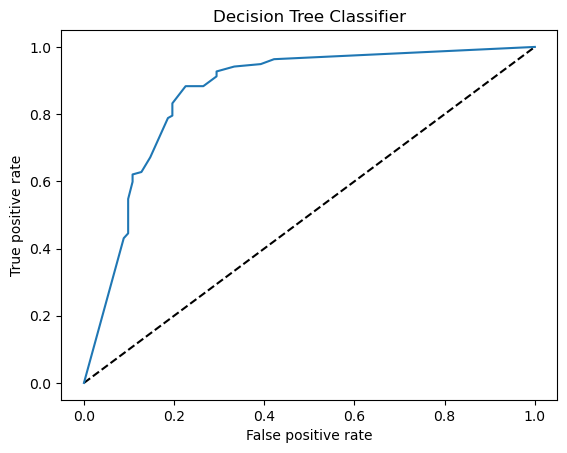

In [231]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

In [232]:
auc_score=roc_auc_score(y_test,FinalModel.predict(x_test))
print(auc_score)

0.8180191784743095


The AUC-ROC curve helps us to visualize how well our machine learning classifier is performing.


In [233]:
import pickle
filename='Loan_Status_classification.pkl'
pickle.dump(FinalModel,open(filename,'wb'))

In [234]:
import pickle
loaded_model=pickle.load(open('Loan_Status_classification.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

82.00836820083683


In [235]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=("predicted","original"))
conclusion

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
predicted,1,1,1,0,0,1,1,0,1,1,...,1,0,1,1,0,0,1,0,1,1
original,0,1,1,1,0,1,1,0,1,1,...,1,0,0,1,0,0,0,0,1,1
